<a href="https://colab.research.google.com/github/prince848/SharkAttack-Case-Study/blob/main/sharkAttackAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [28]:
import os
shark = pd.read_csv("/content/sample_data/sharkfinal.csv", encoding = "latin-1")
print(shark.shape)
shark

(4363, 14)


,Case Number,Date,Year,Sex,Type,Species,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Month
0,2009.01.18,2009-01-18,2009.0,M,Provoked,WHITE SHARK,AUSTRALIA,Victoria,Off Tower Hill,FISHING,NaN,N,day-morning,Jan
1,1929.12.03.R,1929-12-03,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Queensland,Townsville,NaN,NaN,Y,Unspecified,Dec
2,1929.10.20,1929-10-20,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Torres Strait,Near Badu Island,DIVING,NaN,N,Unspecified,Oct
3,1929.09.01,1929-09-01,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Queensland,"Ross River, Townsville",OTHER,42.0,Y,Unspecified,Sep
4,1959.12.07,1959-12-07,1959.0,M,Unspecified,Unknown,AUSTRALIA,South Australia,Laura Bay,SPEARFISHING,NaN,Unknown,Unspecified,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2000.07.22,2000-07-22,2000.0,F,Unprovoked,NURSE SHARK,USA,Florida,"Big Pine Key, Monroe County",SNORKELING,45.0,N,Unspecified,Jul
4359,2000.07.17,2000-07-17,2000.0,M,Unprovoked,Unknown,USA,North Carolina,"Oceanic Pier, Wrightsville Beach, New Hanover ...",SURFING,16.0,N,Unspecified,Jul
4360,2000.07.16.b,2000-07-16,2000.0,M,Unprovoked,COLORED SHARK,USA,North Carolina,"Holden Beach, Brunswick County",SURFING,14.0,N,Unspecified,Jul
4361,1999.10.01,1999-10-01,1999.0,M,Unprovoked,TIGER SHARK,USA,Hawaii,Old Kona Airport State Park,OTHER,16.0,N,night,Oct


In [30]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Sex', 'Type', 'Species', 'Country',
       'Area', 'Location', 'Activity', 'Age', 'Fatal (Y/N)', 'Time', 'Month'],
      dtype='object')

In [31]:
shark.isnull().sum()

Case Number       0
Date            375
Year             47
Sex             315
Type              9
Species           0
Country           0
Area              0
Location        100
Activity        319
Age            1668
Fatal (Y/N)       0
Time              0
Month             0
dtype: int64

In [32]:
gender = shark.groupby(["Sex"]).agg({"Sex":"count"})
gender = gender.rename(columns={"Sex": "count"})
gender = gender.sort_values("count", ascending=False)
print(gender.sum())
gender


count    4048
dtype: int64


,count
Sex,
M,3549
F,499


In [33]:
country = pd.crosstab(index=shark['Country'], columns=shark["Fatal (Y/N)"]).sort_values("Y",ascending=False)
country = country[country.Y>1]
country

Fatal (Y/N),N,Unknown,Y
Country,,,
AUSTRALIA,964,137,290
USA,1896,195,155
SOUTH AFRICA,412,66,105
NEW ZEALAND,85,12,21
SINGAPORE,2,0,3
JAPAN,2,0,2


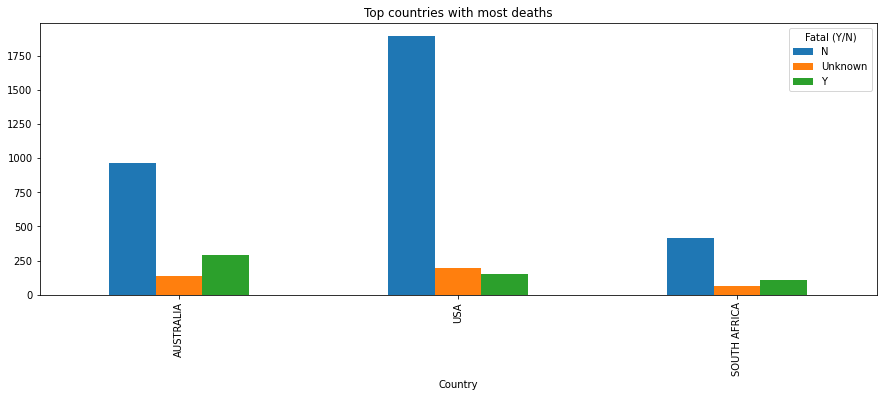

In [34]:
country[country.Y>70].plot(title = "Top countries with most deaths", kind = "bar", figsize = (15,5))
plt.show()

In [35]:
activity = pd.crosstab(index=shark['Activity'][shark['Activity']!="unknown"], columns=shark["Fatal (Y/N)"]).sort_values("Y",ascending=False)
activity = activity[activity.Y>1]
activity

Fatal (Y/N),N,Unknown,Y
Activity,,,
OTHER,694,95,211
SWIMMING,386,71,148
BATHING,269,25,44
SURFING,926,43,40
DIVING,127,24,27
FISHING,271,12,19
BODY BOARDING,125,5,18
SPEARFISHING,157,20,16
FELL INTO THE WATER,3,1,12


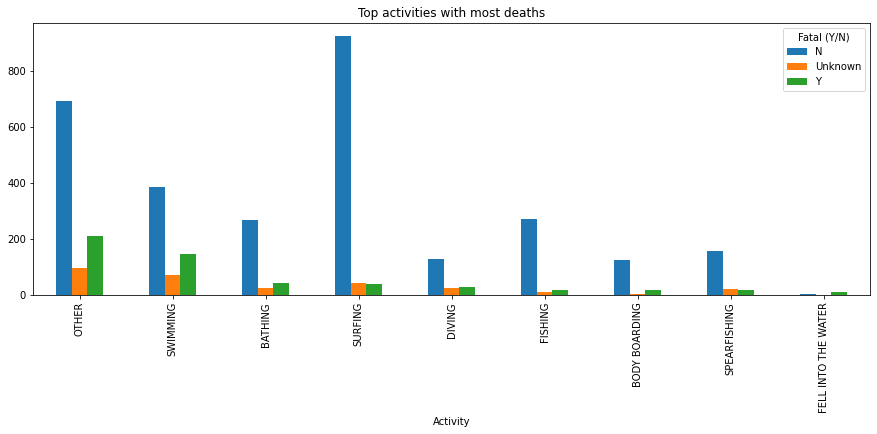

In [36]:
activity[activity.Y>10].plot(title = "Top activities with most deaths", kind = "bar", figsize = (15,5))
plt.show()

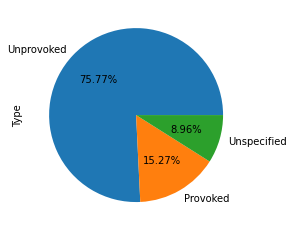

In [37]:
shark['Type'].value_counts().head(3).plot.pie(autopct='%1.2f%%')

In [38]:
def save_viz(barchart):
    os.chdir('/content/sample_data')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

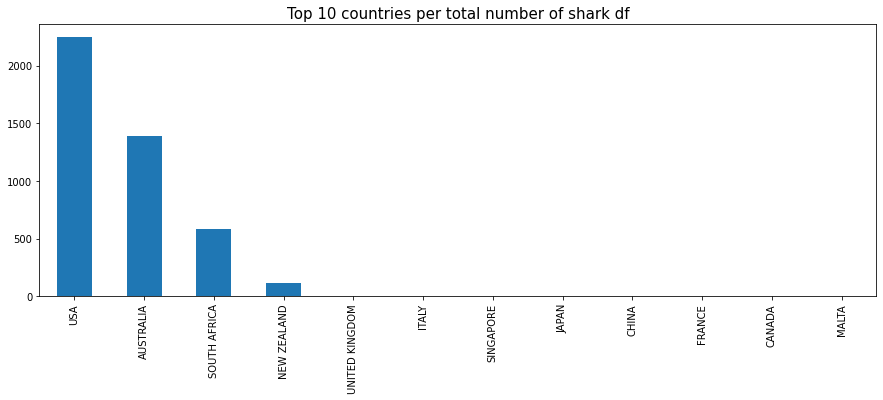

In [39]:
sharks_country_chart=shark['Country'].value_counts().plot.bar(fontsize=10, figsize=(15, 5)).set_title('Top 10 countries per total number of shark df', fontsize=15)

title='Top 10 countries per total number of shark df'
save_viz(sharks_country_chart)